In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

df=pd.read_csv('churn.csv')

## Analysing the raw, uncleaned dataset

In [2]:
df.info()  #shows all column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             10000 non-null  int64  
 1   CustomerId            10000 non-null  int64  
 2   Surname               9914 non-null   object 
 3   CreditScore           9963 non-null   float64
 4   Geography             9963 non-null   object 
 5   Gender                9963 non-null   object 
 6   Sex                   9805 non-null   float64
 7   Age                   9963 non-null   float64
 8   CurrentWorkingStatus  9963 non-null   float64
 9   Tenure                9963 non-null   float64
 10  Balance               9963 non-null   float64
 11  NumOfProducts         9859 non-null   float64
 12  ComplaintsLodged      9963 non-null   float64
 13  HasCrCard             9963 non-null   float64
 14  IsActiveMember        9963 non-null   float64
 15  EstimatedSalary     

In [3]:
# df.shape
before_preprocessing = df['Exited'].value_counts(normalize=True)

In [4]:
df.describe()  #shows statistics(such as count, mean) of the numerical columns

,RowNumber,CustomerId,CreditScore,Sex,Age,CurrentWorkingStatus,Tenure,Balance,NumOfProducts,ComplaintsLodged,HasCrCard,IsActiveMember
count,10000.00000,1.000000e+04,9963.000000,9805.000000,9963.000000,9963.000000,9963.000000,9963.000000,9859.000000,9963.000000,9963.000000,9963.000000
mean,5000.50000,1.569094e+07,650.624812,0.453952,38.898223,0.996587,5.014453,76501.435194,1.531088,0.207167,0.705510,0.515006
std,2886.89568,7.193619e+04,96.606044,0.497900,10.541477,0.058321,2.891880,62411.069692,0.582007,0.405296,0.455836,0.499800
min,1.00000,1.556570e+07,350.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,37.000000,1.000000,5.000000,97234.580000,1.000000,0.000000,1.000000,1.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,1.000000,7.500000,127657.840000,2.000000,0.000000,1.000000,1.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,92.000000,1.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,1.000000


In [5]:
df.describe(include='O')  #shows statistics of the numerical columns as well as object datatype columns

,Surname,Geography,Gender,EstimatedSalary,Exited
count,9914,9963,9963,9896,10000
unique,2921,6,2,9832,2
top,Smith,France,Male,?,No
freq,32,4963,5439,64,7963


In [6]:
df.isna().sum()  #shows count of missing values in each column

RowNumber                 0
CustomerId                0
Surname                  86
CreditScore              37
Geography                37
Gender                   37
Sex                     195
Age                      37
CurrentWorkingStatus     37
Tenure                   37
Balance                  37
NumOfProducts           141
ComplaintsLodged         37
HasCrCard                37
IsActiveMember           37
EstimatedSalary         104
Exited                    0
dtype: int64

## Data Preparation

In [7]:
df.drop(['RowNumber', 'CustomerId', 'Surname','Sex'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,CurrentWorkingStatus,Tenure,Balance,NumOfProducts,ComplaintsLodged,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,1.0,2.0,0.00,1.0,1.0,1.0,1.0,101348.88,Yes
1,608.0,Spain,Female,41.0,1.0,1.0,83807.86,1.0,0.0,0.0,1.0,112542.58,No
2,502.0,France,Female,42.0,1.0,8.0,159660.80,3.0,1.0,1.0,0.0,113931.57,Yes
3,699.0,France,Female,39.0,1.0,1.0,0.00,2.0,0.0,0.0,0.0,?,No
4,850.0,Spain,Female,43.0,1.0,2.0,125510.82,1.0,0.0,1.0,1.0,79084.1,No


In [8]:
df.isna().sum()

CreditScore              37
Geography                37
Gender                   37
Age                      37
CurrentWorkingStatus     37
Tenure                   37
Balance                  37
NumOfProducts           141
ComplaintsLodged         37
HasCrCard                37
IsActiveMember           37
EstimatedSalary         104
Exited                    0
dtype: int64

In [9]:
df.dtypes  #shows datatype of each column

CreditScore             float64
Geography                object
Gender                   object
Age                     float64
CurrentWorkingStatus    float64
Tenure                  float64
Balance                 float64
NumOfProducts           float64
ComplaintsLodged        float64
HasCrCard               float64
IsActiveMember          float64
EstimatedSalary          object
Exited                   object
dtype: object

### Filling missing values with certain statistics such as mean, meadian and mode

In [10]:
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')  #converting object datatype to numeric datatype
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(df['EstimatedSalary'].median())

df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].mean())
df['Geography'] = df['Geography'].fillna(df['Geography'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

mask = df['Age'] < 1
df.loc[mask, 'Age'] = np.nan
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = df['Age'].astype(int)

df['CurrentWorkingStatus'] = df['CurrentWorkingStatus'].fillna(df['CurrentWorkingStatus'].median())
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['Balance'] = df['Balance'].fillna(df['Balance'].median())
df['NumOfProducts'] = df['NumOfProducts'].fillna(df['NumOfProducts'].median())
df['ComplaintsLodged'] = df['ComplaintsLodged'].fillna(df['ComplaintsLodged'].median())
df['HasCrCard'] = df['HasCrCard'].fillna(df['HasCrCard'].mode()[0])
df['IsActiveMember'] = df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0])

In [11]:
df.isna().sum()

CreditScore             0
Geography               0
Gender                  0
Age                     0
CurrentWorkingStatus    0
Tenure                  0
Balance                 0
NumOfProducts           0
ComplaintsLodged        0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited                  0
dtype: int64

### Dealing with object type datas

In [12]:
df.select_dtypes(include=['object']).columns

Index(['Geography', 'Gender', 'Exited'], dtype='object')

In [13]:
df['Geography'].value_counts()

Geography
France     5000
Germany    2484
Spain      2457
FR           35
ES           13
DE           11
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts()

Gender
Male      5476
Female    4524
Name: count, dtype: int64

In [15]:
df['Exited'].value_counts()

Exited
No     7963
Yes    2037
Name: count, dtype: int64

In [16]:
df['Geography'] = df['Geography'].replace({
    'FR': 'France',
    'ES': 'Spain',
    'DE': 'Germany'
})

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,CurrentWorkingStatus,Tenure,Balance,NumOfProducts,ComplaintsLodged,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,1.0,2.0,0.00,1.0,1.0,1.0,1.0,101348.880,Yes
1,608.0,Spain,Female,41,1.0,1.0,83807.86,1.0,0.0,0.0,1.0,112542.580,No
2,502.0,France,Female,42,1.0,8.0,159660.80,3.0,1.0,1.0,0.0,113931.570,Yes
3,699.0,France,Female,39,1.0,1.0,0.00,2.0,0.0,0.0,0.0,100438.025,No
4,850.0,Spain,Female,43,1.0,2.0,125510.82,1.0,0.0,1.0,1.0,79084.100,No


In [18]:
gender_map = {'Female':0, 'Male': 1}
df['Gender'] = df['Gender'].map(gender_map)

exited_map = {'No':0, 'Yes': 1}
df['Exited'] = df['Exited'].map(exited_map)

In [19]:
df.dtypes

CreditScore             float64
Geography                object
Gender                    int64
Age                       int64
CurrentWorkingStatus    float64
Tenure                  float64
Balance                 float64
NumOfProducts           float64
ComplaintsLodged        float64
HasCrCard               float64
IsActiveMember          float64
EstimatedSalary         float64
Exited                    int64
dtype: object

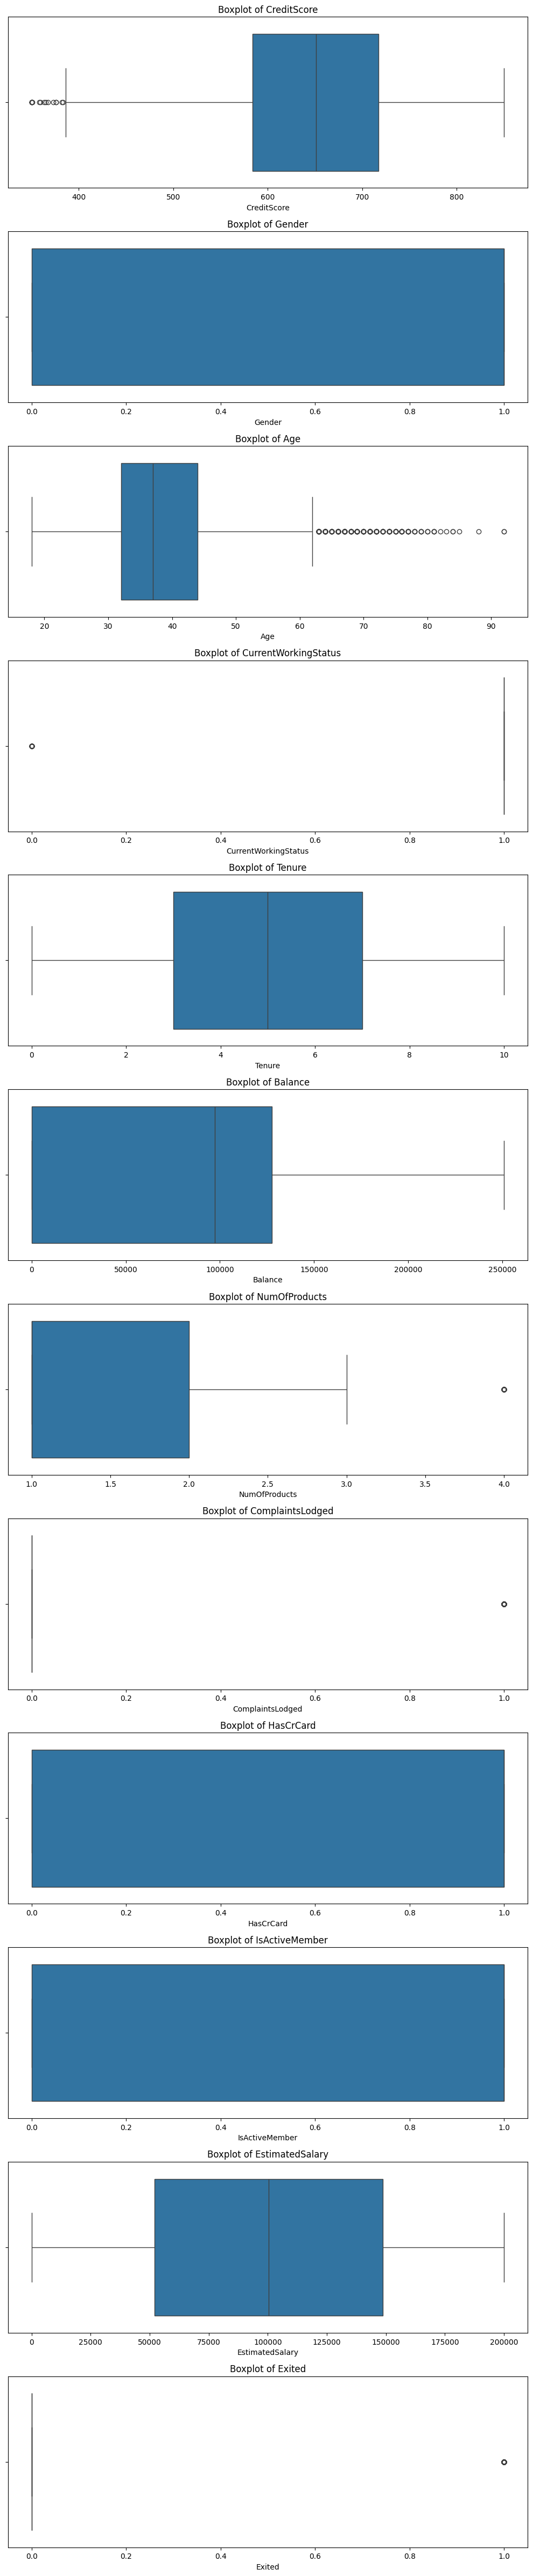

In [20]:
numerical_cols = df.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [21]:
df['Gender'].value_counts()

Gender
1    5476
0    4524
Name: count, dtype: int64

In [22]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [23]:
after_preprocessing = df['Exited'].value_counts(normalize=True)

print("Proportion of 'Exited' before preprocessing:")
print(before_preprocessing)

print("\nProportion of 'Exited' after preprocessing:")
print(after_preprocessing)

Proportion of 'Exited' before preprocessing:
Exited
No     0.7963
Yes    0.2037
Name: proportion, dtype: float64

Proportion of 'Exited' after preprocessing:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


## Decision Tree

In [24]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Encode categorical variables (e.g., 'Geography', 'Gender', etc.)
df_encoded = pd.get_dummies(df, drop_first=True)

#Split into features and target
X = df_encoded.drop(['Exited'], axis=1)
y = df_encoded['Exited']

random_state = 10
test_set_size = 0.3 # 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size,
stratify=y, random_state=random_state)

print("Size of training set:", len(X_train))
print("Size of testing set:", len(X_test))



Size of training set: 7000
Size of testing set: 3000


In [25]:
from sklearn.tree import DecisionTreeClassifier
# simple decision tree training
model = DecisionTreeClassifier(random_state=random_state)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=10)

In [26]:
print('*****Model parameters******\n', model.get_params(deep=True))
print('Number of leaves in the trained model:', model.get_n_leaves())

*****Model parameters******
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 10, 'splitter': 'best'}
Number of leaves in the trained model: 310


In [27]:
print("Training set accuracy:", model.score(X_train, y_train))
print("Testing set accuracy:", model.score(X_test, y_test))

Training set accuracy: 0.9994285714285714
Testing set accuracy: 0.947


In [28]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2389
           1       0.88      0.86      0.87       611

    accuracy                           0.95      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.95      0.95      0.95      3000



In [30]:
feature_names = X_train.columns  # Replace X_train with your actual DataFrame

In [31]:
def display_feature_importances(model, feature_names, features_to_display=20):
    
    importances = model.feature_importances_
    # Sort them out in descending order.
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)
    
    # Limit to 20 features, you can leave this out to print out everything.
    indices = indices[:features_to_display]
    for i in indices:
        print(feature_names[i], ':', importances[i])
    print("Number of leaves:", model.get_n_leaves())

# Call the function with appropriate arguments
display_feature_importances(model, feature_names)


ComplaintsLodged : 0.8102849835384187
EstimatedSalary : 0.03982643187621538
Age : 0.033550492887376056
Balance : 0.0331521393910697
CreditScore : 0.030887436527046588
Tenure : 0.01624484004382366
NumOfProducts : 0.01368707058919359
Gender : 0.007396043840149934
IsActiveMember : 0.005138811074817201
Geography_Germany : 0.004595477599208368
HasCrCard : 0.002782772130055097
Geography_Spain : 0.002453500502625629
CurrentWorkingStatus : 0.0
Number of leaves: 310


In [32]:
# Allow us to display images directly in the notebook.
from IPython.display import Image, display
from io import StringIO
from sklearn.tree import export_graphviz
!pip install graphviz
import pydot


def visualize_model(model):
    # export_graphviz() expects a file to write to. Rather than writing to a file and
    # then reading it back in, we can use StringIO() to create a temporary file in memory.
    dotfile = StringIO()
    export_graphviz(model, out_file=dotfile, feature_names=feature_names)
    # Use pydot to load this dot file, and then display it in the notebook.
    # Dot files can contain multiple graphs, we want the first one, hence [0].
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    display(Image(graph[0].create_png()))

# Call the function with your trained model
visualize_model(model)


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


In [33]:
# Re-train with a small max_depth limit.
model_small = DecisionTreeClassifier(max_depth=3, random_state=random_state)
model_small.fit(X_train, y_train)
# Evaluate the model again.
y_pred = model_small.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2394
           1       0.93      0.94      0.94       606

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



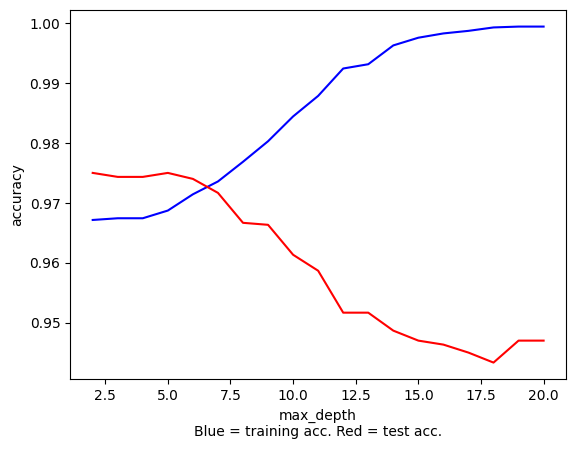

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Check the model performance for max depth from 2-20, store into two lists that we can plot.
test_score = []
train_score = []
for max_depth in range(2, 21):
    temp_model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    temp_model.fit(X_train, y_train)
    test_score.append(temp_model.score(X_test, y_test))
    train_score.append(temp_model.score(X_train, y_train))

# Plot max depth hyperparameter values vs training and test accuracy score.
plt.plot(range(2, 21), train_score, 'b', range(2, 21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()



In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define grid search CV parameters.
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 7),
    'min_samples_leaf': range(20, 60, 10)
}

def perform_grid_search(X_train, y_train, X_test, y_test, params, num_folds=10):
    # Instantiate the search class. Pass it the model to use (DecisionTreeClassifier)
    # and the number of folds.
    cv = GridSearchCV(
        param_grid=params,
        estimator=DecisionTreeClassifier(random_state=random_state),
        cv=num_folds,
        verbose=1,
        n_jobs=-1
    )
    cv.fit(X_train, y_train)
    
    # Display the accuracy of the best fit model.
    print("Train accuracy:", cv.score(X_train, y_train))
    print("Test accuracy:", cv.score(X_test, y_test))
    
    # Evaluate the best fit model.
    y_pred = cv.predict(X_test)
    print(classification_report(y_pred, y_test))
    
    # Display parameters of the best model.
    print(cv.best_params_)
    
    return cv

# Example call (ensure all variables are defined properly)
perform_grid_search(X_train, y_train, X_test, y_test, params)


Fitting 10 folds for each of 40 candidates, totalling 400 fits
Train accuracy: 0.9668571428571429
Test accuracy: 0.9743333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2394
           1       0.93      0.94      0.94       606

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 7),
                         'min_samples_leaf': range(20, 60, 10)},
             verbose=1)

In [36]:
params = {
'criterion': ['gini', 'entropy'],
'max_depth': range(2, 8),
'min_samples_leaf': range(1, 30)
}
cv = perform_grid_search(X_train, y_train, X_test, y_test, params)

Fitting 10 folds for each of 348 candidates, totalling 3480 fits
Train accuracy: 0.9707142857142858
Test accuracy: 0.9726666666666667
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2391
           1       0.93      0.93      0.93       609

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8}


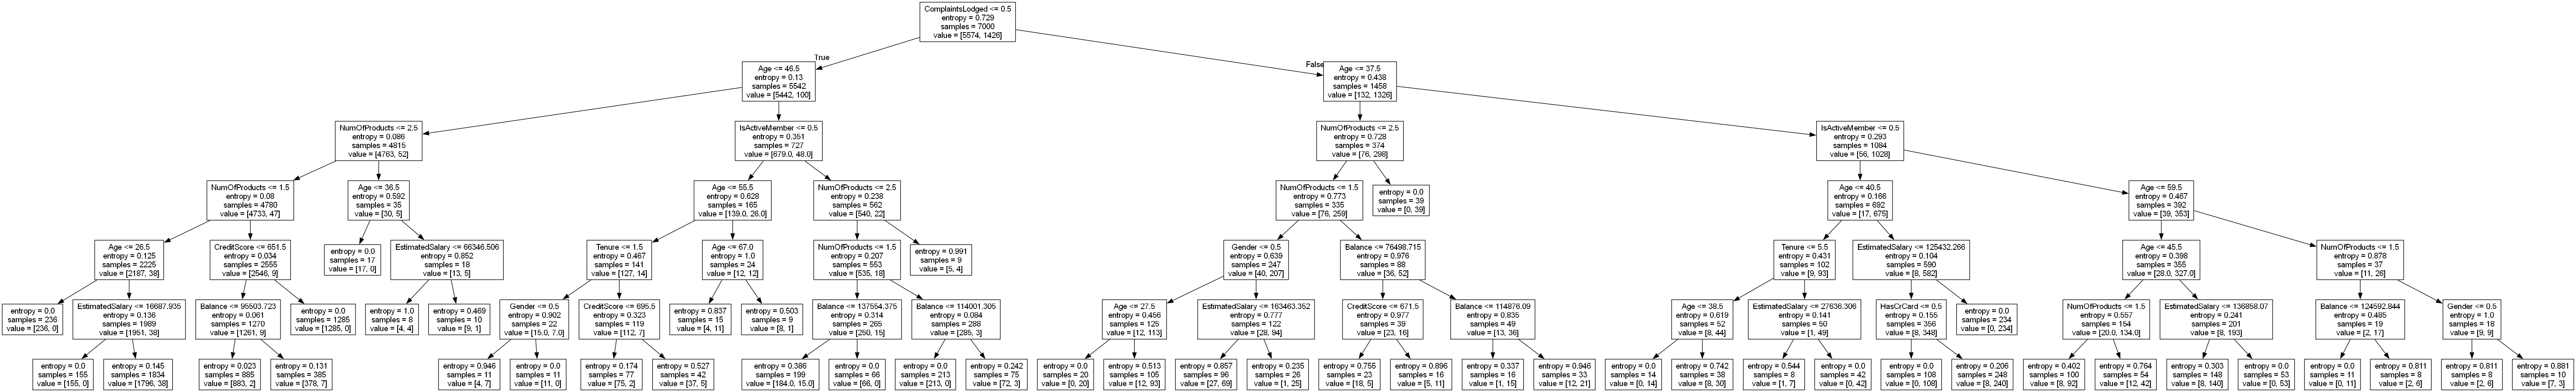

In [37]:
model_cv = cv.best_estimator_
visualize_model(model_cv)

In [38]:
y_test = y_test.to_numpy()

In [39]:
# Probability prediction from decision tree
y_pred = model_cv.predict(X_test)
y_pred_proba_dt = model_cv.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor).")
print("You should be able to see the default threshold of 0.5.")
print("(Probs on zero) (probs on one) (prediction made) (label)")

# Print top 20 predictions
for i in range(20):
    print(f"{y_pred_proba_dt[i][0]:.13f} {y_pred_proba_dt[i][1]:.13f} {y_pred[i]:<10d} {y_test[i]:10d}")


Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor).
You should be able to see the default threshold of 0.5.
(Probs on zero) (probs on one) (prediction made) (label)
0.2812500000000 0.7187500000000 1                   1
0.9818181818182 0.0181818181818 0                   0
1.0000000000000 0.0000000000000 0                   0
0.9792802617230 0.0207197382770 0                   0
1.0000000000000 0.0000000000000 0                   0
0.0540540540541 0.9459459459459 1                   1
0.9792802617230 0.0207197382770 0                   0
1.0000000000000 0.0000000000000 0                   0
0.9977401129944 0.0022598870056 0                   0
0.9792802617230 0.0207197382770 0                   0
0.0800000000000 0.9200000000000 1                   1
0.9792802617230 0.0207197382770 0                   0
0.0000000000000 1.0000000000000 1                   1
0.9792802617230 0.0207197382770 0                   0
1.0000000000000 0.

In [40]:
from sklearn.metrics import roc_auc_score
y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_small = model_small.predict_proba(X_test)
y_pred_proba_dt_cv = model_cv.predict_proba(X_test)
roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_small = roc_auc_score(y_test, y_pred_proba_dt_small[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])
print("ROC index on test for default model:", roc_index_dt)
print("ROC index on test for small model:", roc_index_dt_small)
print("ROC index on test for grid search model:", roc_index_dt_cv)

ROC index on test for default model: 0.9162120575825233
ROC index on test for small model: 0.9674072176142836
ROC index on test for grid search model: 0.980879700262866


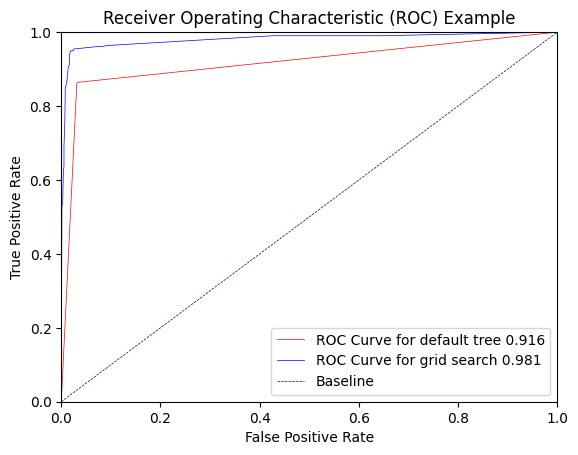

In [41]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve for the default tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:, 1])

# Calculate ROC curve for the grid search-optimized tree
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:, 1])

# Plot the ROC curves using matplotlib
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for default tree {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for grid search {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# Add a baseline ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, label='Baseline', linestyle='--')

# Set plot limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Example')

# Add legend
plt.legend(loc="lower right")

# Show the plot
plt.show()


In [42]:
from sklearn.metrics import auc

roc_index_dt = auc(fpr_dt, tpr_dt)              # AUC for default tree
roc_index_dt_cv = auc(fpr_dt_cv, tpr_dt_cv)     # AUC for grid search tree

In [43]:
# import pickle
# with open("DT.pickle", "wb") as f:
#     pickle.dump((model_cv, roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv), f)

# import pickle
# lr_best = cv
# roc_index_lr_best = roc_index_lr_cv
# tpr_lr_best = tpr_lr_cv
# fpr_lr_best = fpr_lr_cv

# with open('LR.pickle', 'wb') as f:
#     pickle.dump([lr_best,roc_index_lr_best, fpr_lr_best, tpr_lr_best], f)

#    
dt_best =  model_cv
# roc_index_dt_cv
# fpr_dt_cv, tpr_dt_cv = pickle.load(f)

## Regression

In [44]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True) #Normalized Geography column in numeric form
df.dtypes

CreditScore             float64
Gender                    int64
Age                       int64
CurrentWorkingStatus    float64
Tenure                  float64
Balance                 float64
NumOfProducts           float64
ComplaintsLodged        float64
HasCrCard               float64
IsActiveMember          float64
EstimatedSalary         float64
Exited                    int64
Geography_Germany          bool
Geography_Spain            bool
dtype: object

In [45]:
df_copy = df.copy()
y = df_copy["Exited"].values
X = df_copy.drop(['Exited'], axis=1)
feature_names = X.columns
X = X.values

In [46]:
from sklearn.model_selection import train_test_split
# Otherwise, we may end up with unbalanced 0/1 labels across the two splits.
random_state = 10
test_set_size = 0.3 # 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, 
stratify=y, random_state=random_state)
print("Size of training set:", len(X_train))
print("Size of testing set:", len(X_test))

Size of training set: 7000
Size of testing set: 3000


In [47]:
from sklearn.preprocessing import StandardScaler
random_seed = 10
scaler = StandardScaler()  # initialise a standard scaler object

print("Before scaling\n-------------")
for i in range(3,6):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(3,6):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #3: min 0.0, max 1.0, mean 1.00 and std dev 0.06
Variable #4: min 0.0, max 10.0, mean 5.01 and std dev 2.89
Variable #5: min 0.0, max 250898.09, mean 75928.34 and std dev 62585.72
After scaling
-------------
Variable #3: min -17.04894913672688, max 0.05865464152543684, mean 0.00 and std dev 1.00
Variable #4: min -1.7318298685084887, max 1.723438502464697, mean 0.00 and std dev 1.00
Variable #5: min -1.2131895129436354, max 2.7956818607444145, mean -0.00 and std dev 1.00


In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=random_state)
# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [49]:
from sklearn.metrics import classification_report
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

#classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.9668571428571429
Test accuracy: 0.974
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2389
           1       0.94      0.93      0.94       611

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [50]:
print(model.coef_)

[[-0.0225811  -0.36069256  0.69802951  0.0129881  -0.03491642  0.05768303
  -0.11707331  2.53018971 -0.0769106  -0.44528764  0.00881654  0.27135918
  -0.06528272]]


In [51]:
coef = model.coef_[0]
# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]
for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

CreditScore : -0.022581100625060756
Gender : -0.36069256260195864
Age : 0.6980295092597539
CurrentWorkingStatus : 0.012988102125959862
Tenure : -0.034916418225231935
Balance : 0.0576830278968319
NumOfProducts : -0.11707330909114883
ComplaintsLodged : 2.53018970605287
HasCrCard : -0.0769105993862911
IsActiveMember : -0.4452876438738469
EstimatedSalary : 0.00881653636489738
Geography_Germany : 0.2713591787113245
Geography_Spain : -0.06528272355841543


In [52]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:13]
for i in indices:
    print(feature_names[i], ':', coef[i])

ComplaintsLodged : 2.53018970605287
Age : 0.6980295092597539
IsActiveMember : -0.4452876438738469
Gender : -0.36069256260195864
Geography_Germany : 0.2713591787113245
NumOfProducts : -0.11707330909114883
HasCrCard : -0.0769105993862911
Geography_Spain : -0.06528272355841543
Balance : 0.0576830278968319
Tenure : -0.034916418225231935
CreditScore : -0.022581100625060756
CurrentWorkingStatus : 0.012988102125959862
EstimatedSalary : 0.00881653636489738


In [53]:
from sklearn.model_selection import GridSearchCV
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, 
estimator=LogisticRegression(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
# test the best model
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9668571428571429
Test accuracy: 0.9736666666666667
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2389
           1       0.94      0.93      0.93       611

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'C': 0.01}


In [54]:
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator = LogisticRegression(random_state=random_state), cv=10)
# run the RFECV
rfe.fit(X_train, y_train)
# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 13
Number of features after elimination 1


In [55]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [56]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
rfe_cv = GridSearchCV(param_grid=params, 
estimator=LogisticRegression(random_state=random_state), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)
# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))
y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9668571428571429
Test accuracy: 0.9743333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2389
           1       0.94      0.93      0.94       611

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'C': 0.01}


In [57]:
# running RFE + log transformation
rfe_log = RFECV(estimator = LogisticRegression(random_state=random_state), cv=10)
rfe_log.fit(X_train, y_train)
# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)
# select features from log transformed dataset
X_train_sel_log = rfe_log.transform(X_train)
X_test_sel_log = rfe_log.transform(X_test)
# init grid search CV on transformed dataset
params = {'C': [pow(10, x) for x in range(-6, 4)]}
rfe_log_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=random_state), cv=10, n_jobs=-1)
rfe_log_cv.fit(X_train_sel_log, y_train)
# test the best model
print("Train accuracy:", rfe_log_cv.score(X_train_sel_log, y_train))
print("Test accuracy:", rfe_log_cv.score(X_test_sel_log, y_test))
y_pred_log = rfe_log_cv.predict(X_test_sel_log)
print(classification_report(y_test, y_pred_log))
# print parameters of the best model
print(rfe_cv.best_params_)

Original feature set 13
Number of features after elimination 1
Train accuracy: 0.9668571428571429
Test accuracy: 0.9743333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2389
           1       0.94      0.93      0.94       611

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'C': 0.001}


In [58]:
from sklearn.metrics import roc_auc_score
y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)
y_pred_proba_rfe_log_cv = rfe_log_cv.predict_proba(X_test_sel_log)

roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
roc_index_rfe_log_cv = roc_auc_score(y_test, y_pred_proba_rfe_log_cv[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)
print("ROC index on test for `rfe_log_cv`:", roc_index_rfe_cv)

ROC index on test for `model`: 0.9785079459250972
ROC index on test for `cv`: 0.9789183101216089
ROC index on test for `rfe_cv`: 0.9589139118943274
ROC index on test for `rfe_log_cv`: 0.9589139118943274


In [59]:
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
fpr_rfe_log_cv, tpr_rfe_log_cv, thresholds_rfe_log_cv = roc_curve(y_test, y_pred_proba_rfe_log_cv[:,1])

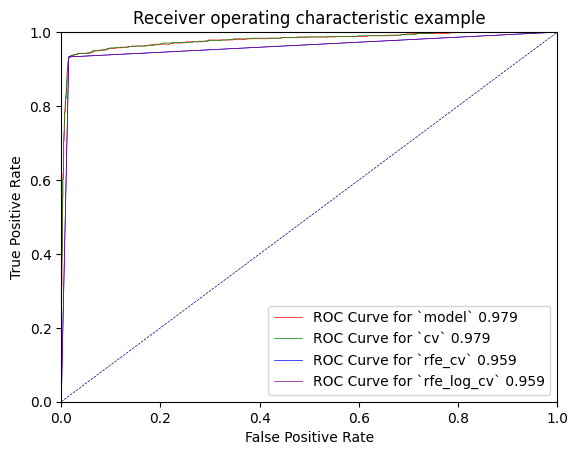

In [60]:
import matplotlib.pyplot as plt
plt.plot(fpr_lr, tpr_lr, label=f'ROC Curve for `model` {roc_index_lr:.3f}', color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label=f'ROC Curve for `cv` {roc_index_lr_cv:.3f}', color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label=f'ROC Curve for `rfe_cv` {roc_index_rfe_cv:.3f}', color='blue', lw=0.5)
plt.plot(fpr_rfe_log_cv, tpr_rfe_log_cv, label=f'ROC Curve for `rfe_log_cv` {roc_index_rfe_log_cv:.3f}', color='purple', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [61]:
# import pickle
lr_best = cv
roc_index_lr_best = roc_index_lr_cv
tpr_lr_best = tpr_lr_cv
fpr_lr_best = fpr_lr_cv

# with open('LR.pickle', 'wb') as f:
#     pickle.dump([lr_best,roc_index_lr_best, fpr_lr_best, tpr_lr_best], f)

## Neural Network

In [62]:
df_copy = df.copy()
y = df_copy["Exited"].values
X = df_copy.drop(['Exited'], axis=1)
feature_names = X.columns
X = X.values

In [63]:
from sklearn.model_selection import train_test_split
# Otherwise, we may end up with unbalanced 0/1 labels across the two splits.
random_state = 10
test_set_size = 0.3 # 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, 
stratify=y, random_state=random_state)
print("Size of training set:", len(X_train))
print("Size of testing set:", len(X_test))

Size of training set: 7000
Size of testing set: 3000


In [64]:
from sklearn.preprocessing import StandardScaler
random_seed = 10
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [65]:
from sklearn.preprocessing import StandardScaler
random_seed = 10
scaler = StandardScaler()  # initialise a standard scaler object

print("Before scaling\n-------------")
for i in range(3,6):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(3,6):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #3: min -17.04894913672688, max 0.05865464152543684, mean 0.00 and std dev 1.00
Variable #4: min -1.7318298685084887, max 1.723438502464697, mean 0.00 and std dev 1.00
Variable #5: min -1.2131895129436354, max 2.7956818607444145, mean -0.00 and std dev 1.00
After scaling
-------------
Variable #3: min -17.04894913672625, max 0.0586546415254349, mean 0.00 and std dev 1.00
Variable #4: min -1.7318298685084441, max 1.7234385024646526, mean 0.00 and std dev 1.00
Variable #5: min -1.2131895129436916, max 2.795681860744547, mean 0.00 and std dev 1.00


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
random_state = 10
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, 
estimator=LogisticRegression(random_state=random_state), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
# test the best model
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9668571428571429
Test accuracy: 0.9736666666666667
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2389
           1       0.94      0.93      0.93       611

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'C': 0.01}


In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import warnings  # hide warnings from optimizer not converging
warnings.filterwarnings('ignore')  # hide warnings in subprocesses, required because we use multiple n_jobs
import os
os.environ["PYTHONWARNINGS"] = "ignore" 

model = MLPClassifier(random_state=random_state)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.9747142857142858
Test accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2389
           1       0.94      0.93      0.93       611

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [68]:
model = MLPClassifier(max_iter=700, random_state=random_state)
model.fit(X_train, y_train)

print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.9924285714285714
Test accuracy: 0.965
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2389
           1       0.92      0.91      0.91       611

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



In [69]:
print(X_train.shape)

(7000, 13)


In [70]:
from sklearn.model_selection import GridSearchCV
import warnings  # hide warnings from optimizer not converging
warnings.filterwarnings('ignore')  # hide warnings in subprocesses, required because we use multiple n_jobs
import os
os.environ["PYTHONWARNINGS"] = "ignore" 

params = {'hidden_layer_sizes': [(x,) for x in range(1, 14, 3)]}
cv_1 = GridSearchCV(param_grid=params, 
estimator=MLPClassifier(random_state=random_state), return_train_score=True, cv=10, 
n_jobs=-1)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(1,), (4,), (7,), (10,),
                                                (13,)]},
             return_train_score=True)

In [71]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([3.78995993, 2.17298708, 2.84927564, 3.90694654, 3.35090065]), 'std_fit_time': array([0.10958596, 0.16022375, 1.05389491, 0.06612438, 0.45768774]), 'mean_score_time': array([0.00259321, 0.00219231, 0.00219431, 0.00199535, 0.00131242]), 'std_score_time': array([0.00091697, 0.00097567, 0.00097745, 0.00089234, 0.00044679]), 'param_hidden_layer_sizes': masked_array(data=[(1,), (4,), (7,), (10,), (13,)],
             mask=[False, False, False, False, False],
       fill_value=np.str_('?'),
            dtype=object), 'params': [{'hidden_layer_sizes': (1,)}, {'hidden_layer_sizes': (4,)}, {'hidden_layer_sizes': (7,)}, {'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (13,)}], 'split0_test_score': array([0.97428571, 0.97571429, 0.97571429, 0.97285714, 0.97428571]), 'split1_test_score': array([0.96571429, 0.96428571, 0.96714286, 0.97      , 0.96571429]), 'split2_test_score': array([0.95571429, 0.95428571, 0.95571429, 0.95714286, 0.95285714]), 'split3_test_score': arra

Total number of models:  5


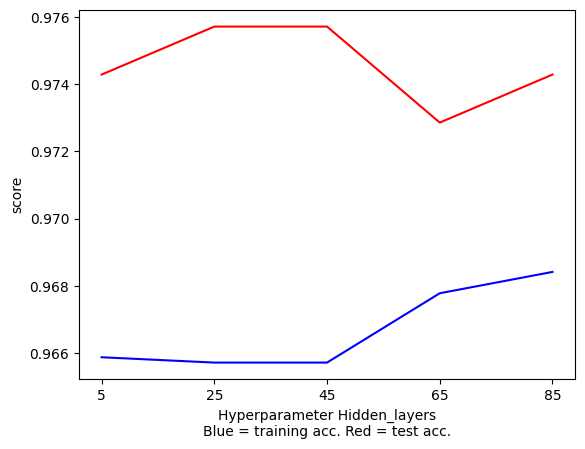

In [72]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), 
test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 86, 20))
plt.ylabel('score')
plt.show()

Total number of models:  5


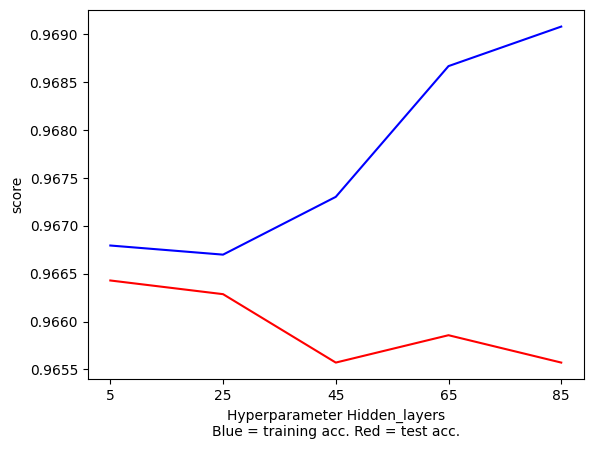

In [73]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), 
test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 86, 20))
plt.ylabel('score')
plt.show()

In [74]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))
y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv_1.best_params_)

Train accuracy: 0.9665714285714285
Test accuracy: 0.9736666666666667
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2389
           1       0.94      0.93      0.93       611

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'hidden_layer_sizes': (1,)}


In [75]:
params = {'hidden_layer_sizes': [(3,), (5,), (9,)], 'alpha': [0.01, 0.001, 0.0001, 
0.00001]}
cv_3 = GridSearchCV(param_grid=params, 
estimator=MLPClassifier(random_state=random_state), cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)
print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))
y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv_3.best_params_)

Train accuracy: 0.9664285714285714
Test accuracy: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2389
           1       0.94      0.93      0.93       611

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'alpha': 0.01, 'hidden_layer_sizes': (3,)}


### Dimensionality Reduction - Selecting using decision tree

In [76]:
from sklearn.feature_selection import SelectFromModel

# with open('DT.pickle', 'rb') as f:
#     dt_best, roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
    
selectmodel = SelectFromModel(dt_best, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)
print(X_train_sel_model.shape)

(7000, 1)


In [77]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,)], 'alpha': [0.01,0.001, 0.0001, 
0.00001]}
cv_sel_model = GridSearchCV(param_grid=params, 
estimator=MLPClassifier(random_state=random_state), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))
y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))
print(cv_sel_model.best_params_)

Train accuracy: 0.9668571428571429
Test accuracy: 0.9743333333333334
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2389
           1       0.94      0.93      0.94       611

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

{'alpha': 0.01, 'hidden_layer_sizes': (3,)}


In [78]:
# After fitting the model:
print("Number of iterations:", cv_sel_model.best_estimator_.n_iter_)

Number of iterations: 167


ROC index on test for NN_default: 0.9783942222913394
ROC index on test for NN with gridsearch 1: 0.9688897353459219
ROC index on test for NN with gridsearch 3: 0.9769993950724782
ROC index on test for NN with feature selection(model selection) and gridsearch: 0.9589139118943274


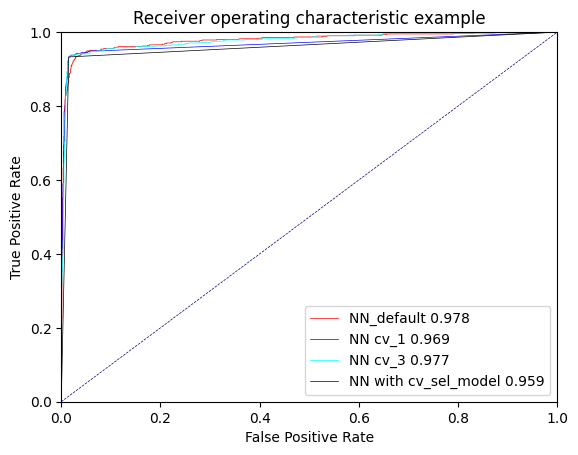

In [79]:
from sklearn.metrics import roc_auc_score
y_pred_proba_nn = model.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_3 = cv_3.predict_proba(X_test)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)

roc_index_nn = roc_auc_score(y_test, y_pred_proba_nn[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_3 = roc_auc_score(y_test, y_pred_proba_cv_3[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])

print("ROC index on test for NN_default:", roc_index_nn)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 3:", roc_index_cv_3)
print("ROC index on test for NN with feature selection(model selection) and gridsearch:", roc_index_cv_sel_model)
  
from sklearn.metrics import roc_curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_cv_3[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr_nn, tpr_nn, label='NN_default {:.3f}'.format(roc_index_nn), color='red', 
lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 {:.3f}'.format(roc_index_cv_3), color='cyan', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC index on test for decision tree: 0.980879700262866
ROC index on test for linear regression: 0.9789183101216089
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.9589139118943274


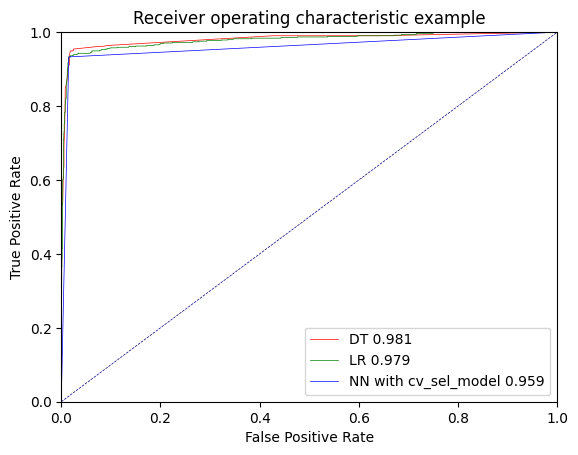

In [80]:
# import pickle
# with open('DT.pickle', 'rb') as f:
#     dt_best, roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
# with open('LR.pickle', 'rb') as f:
#  lr_best, roc_index_lr_cv, fpr_lr_cv, tpr_lr_cv = pickle.load(f)
    
print("ROC index on test for decision tree:", roc_index_dt_cv)
print("ROC index on test for linear regression:", roc_index_lr_cv)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

plt.plot(fpr_dt_cv, tpr_dt_cv, label='DT {:.3f}'.format(roc_index_dt_cv), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='LR {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='blue', lw=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()